## 라이브러리 임포트

In [1]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
from transformers import BertTokenizer, BertModel

In [4]:
# torch
import torch 

In [5]:
# 평가지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [6]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [7]:
# font manager
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# tqdm
from tqdm import tqdm

In [9]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
import re

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [14]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 751.6 kB/s eta 0:00:17
     --------------------------------------- 0.1/12.8 MB 853.3 kB/s eta 0:00:15
      -------------------------------------- 0.2/12.8 MB 958.4 kB/s eta 0:00:14
      -------------------------------------- 0.3/12.8 MB 983.0 kB/s eta 0:00:13
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/12.8 MB 1.1


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용중인 디바이스:", device)

사용중인 디바이스: cuda


In [19]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? True
사용 중인 GPU: NVIDIA GeForce MX450


## Data Load

In [20]:
# 파일 경로
file_path = r"C:\Users\wonny\OneDrive\문서\카카오톡 받은 파일\movie 10000.csv"

# 데이터 로드
df = pd.read_csv(file_path)

In [21]:
# 데이터 확인
print(df.shape)

(9350, 12)


In [22]:
print(df.head())

      video_id                                              title  \
0  8kggT2ej-lo                 Would You Pet a Cheetah in Africa?   
1  H42zWaD4A4s  The World's Highest Security Prison: CECOT (Th...   
2  aNUYGRn3W9Q                   COBRA GYPSIES - Full Documentary   
3  0UJYYkK4d8s  June 6, 1944 – The Light of Dawn | History - D...   
4  XmtXC_n6X6Q  Our Planet | From Deserts to Grasslands | FULL...   

      channel_title  category_id  \
0           MrBeast           24   
1        Ruhi Çenet           27   
2     Raphael Treza            1   
3  Best Documentary           25   
4           Netflix           24   

                                                tags      views     likes  \
0                                             [none]  816300646  27859737   
1  ruhi çenet|ruhi cenet|documentary|ruhi cenet d...  112036494   2009246   
2  Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...   56065571    333002   
3  WWII|war|operation overlord|world war II|norma...   53961

## Data Preporcessing

In [23]:
# 사용할 칼럼만 추출 
movie = df[['title', 'views']].copy()

In [24]:
movie

,title,views
0,Would You Pet a Cheetah in Africa?,816300646
1,The World's Highest Security Prison: CECOT (Th...,112036494
2,COBRA GYPSIES - Full Documentary,56065571
3,"June 6, 1944 – The Light of Dawn | History - D...",53961215
4,Our Planet | From Deserts to Grasslands | FULL...,42082072
...,...,...
9345,Common worries among us... #moving #k-drama #D...,1108
9346,무빙 구룡포 불주먹으로 100대1 싸움 폼미쳤다 #moving #디즈니플러스 #류승룡,1122
9347,"김성균, 아이언맨 저리가라 강렬한 파워 착지 #무빙(MOVING)",1033
9348,2024 연극 '엔젤스 인 아메리카' MOVING POSTER - 로이 이효정,1046


In [25]:
# target scaling (log1p + standard)
movie['log_views'] = np.log1p(movie['views'])

scaler = StandardScaler()
movie['log_views_scaled'] = scaler.fit_transform(movie[['log_views']])

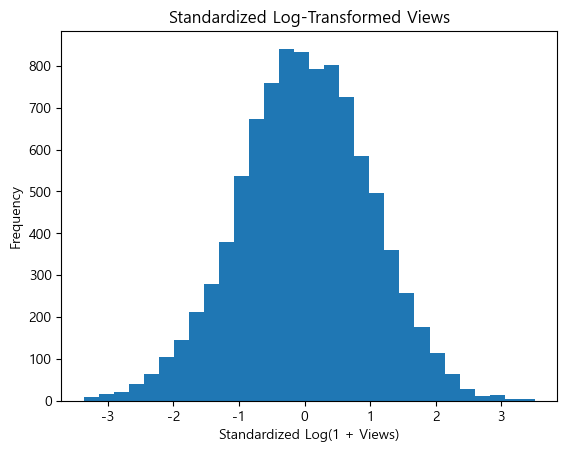

In [26]:
plt.hist(movie['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

---------------------------------------------------------------------------------------------------------------------

## Modeling

### function definition

In [27]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 형태소 분석
    doc = nlp(text)

    # 4. 명사/형용사 + 불용어 제거 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [28]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [29]:
def extract_features(row):
    features = {}

    # 원본 텍스트
    title = row['title'] if isinstance(row['title'], str) else ''

    # 전처리된 텍스트
    cleaned_title = preprocess_title(title)

    # 제목 길이 및 단어 수 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # 느낌표 / 물음표 개수
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # 숫자 포함 여부 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # 키워드 포함 여부 (사전 정의된 keyword 리스트 필요)
    keywords = [
        'rank', 'op', 'patch', 'update', 'buff', 'nerf', 'new', 'epic',
        'trick', 'tips', 'glitch', 'record', 'kill', 'highlight', 'champion',
        'trailer', 'royale', 'official', 'reveal', 'black', 'multiplayer'
    ]
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # 대문자 비율 30% 이상 여부
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # 품사 카운트
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


In [30]:
def compute_rule_score(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += -0.03 * features['title_len']

    # 2. 단어 수: 많을수록 클릭 유도 가능성 있음
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score += 0.5 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.1 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.5 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    return score

In [31]:
# CLS 벡터 추출 함수
def extract_cls_embedding(text):
    encoding = tokenizer(text,
                         max_length=32,
                         truncation=True,
                         padding='max_length',
                         return_tensors='pt')
    input_ids_tensor = encoding['input_ids'].to(device)
    attention_mask_tensor = encoding['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids_tensor, attention_mask=attention_mask_tensor)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

In [32]:
# Model 성능 평가 함수 
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)

    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Spearman: {spearman_corr:.4f}")
    
    return model, rmse, r2, spearman_corr

### rule-based feature

In [33]:
# 조회수가 높은 영상에 자주 등장하는 키워드 사전 구축 
keywords = [
    "vlog", "short", "minivlog", "food", "korea", "travel", "korean", "dailyvlog",
    "day", "camping", "foodvlog", "foodie", "travelvlog", "streetfood", "daily",
    "india", "trend", "eat", "life", "challenge", "japan", "street", "trip",
    "indianfood", "train", "recipe", "asmr", "grwm", "hour", "delhi",'bushcraft', 'skill', 'survival'
]



In [34]:
movie['rule_score'] = movie.apply(lambda row: compute_rule_score(extract_features(row)), axis=1)

In [35]:
movie

,title,views,log_views,log_views_scaled,rule_score
0,Would You Pet a Cheetah in Africa?,816300646,20.520293,3.379239,-0.72
1,The World's Highest Security Prison: CECOT (Th...,112036494,18.534335,2.392694,-1.86
2,COBRA GYPSIES - Full Documentary,56065571,17.842032,2.048785,-0.66
3,"June 6, 1944 – The Light of Dawn | History - D...",53961215,17.803776,2.029781,-1.31
4,Our Planet | From Deserts to Grasslands | FULL...,42082072,17.555132,1.906264,-0.42
...,...,...,...,...,...
9345,Common worries among us... #moving #k-drama #D...,1108,7.011214,-3.331537,-2.03
9346,무빙 구룡포 불주먹으로 100대1 싸움 폼미쳤다 #moving #디즈니플러스 #류승룡,1122,7.023759,-3.325305,0.29
9347,"김성균, 아이언맨 저리가라 강렬한 파워 착지 #무빙(MOVING)",1033,6.941190,-3.366322,-1.55
9348,2024 연극 '엔젤스 인 아메리카' MOVING POSTER - 로이 이효정,1046,6.953684,-3.360116,0.31


### BERT embeddings

In [36]:
# BERT load 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [37]:
## 전체 제목을 cls로 추출 
embeddings = np.array([
    extract_cls_embedding(title) for title in tqdm(movie['title'])
])

100%|██████████████████████████████████████████████████████████████████████████████| 9350/9350 [04:41<00:00, 33.22it/s]


### Hybrid model - feature level

먼저 피처들 간 스케일 차이 확인 후 피처 스케일링 진행

In [38]:
rule_score = movie[['rule_score']].values

In [39]:
bert_dim_0 = embeddings[:, 0]

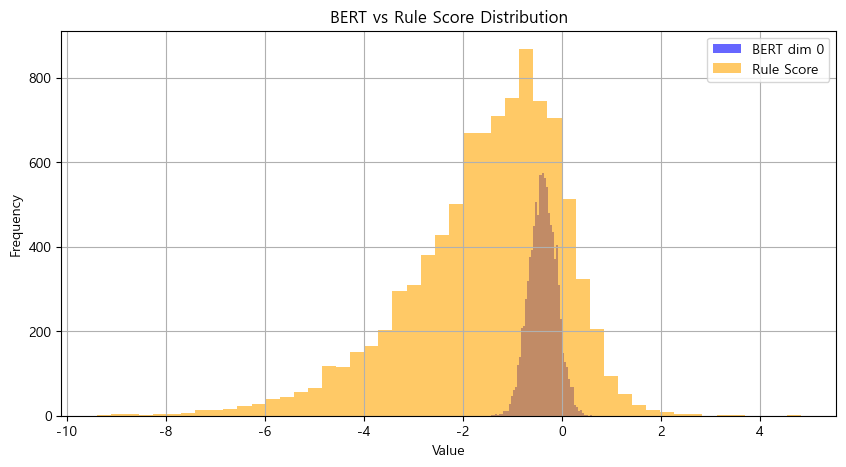

In [40]:
# 두 피처의 분포를 시각화해서 스케일링 필요한지 확인 
plt.figure(figsize=(10, 5))
plt.hist(bert_dim_0, bins=50, alpha=0.6, label='BERT dim 0', color='blue')
plt.hist(rule_score, bins=50, alpha=0.6, label='Rule Score', color='orange')
plt.title('BERT vs Rule Score Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# 피처 스케일링
rule_scaled = scaler.fit_transform(movie[['rule_score']])

피처 결합하여 다양한 모델로 실험

In [43]:
# 두 피처 결합
X = np.hstack([embeddings, rule_scaled])

# target 처리
y = movie['log_views_scaled']

# test, train dataset 분리 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

----------------------------------------------------------------------------------------------------------------------

Linear Regression

In [44]:
# Linear Regression 
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

RMSE: 0.8995
R²: 0.1798
Spearman: 0.4141


(LinearRegression(),
 np.float64(0.8995359350622285),
 0.17984325712845217,
 np.float64(0.41407675072696626))

결과값이 이상함 - 디버깅

In [45]:
# 예측값
y_pred = lr.predict(X_test)

# 로그 스케일이면 되돌림
y_pred_raw = np.expm1(y_pred)
y_test_raw = np.expm1(y_test)

# 비교
for yt, yp in zip(y_test_raw[:10], y_pred_raw[:10]):
    print(f"True: {yt:.0f} / Pred: {yp:.0f}")

True: -1 / Pred: -1
True: 1 / Pred: 0
True: -1 / Pred: -0
True: -0 / Pred: -1
True: -1 / Pred: -1
True: -1 / Pred: -0
True: -1 / Pred: -0
True: -1 / Pred: -0
True: -0 / Pred: 0
True: 4 / Pred: 2


예측값이 무한대로 튀는 경우가 있음을 확인함. 문제 확인을 위해 디버깅

In [46]:
print("Rule Score (정규화 후): mean =", rule_scaled.mean(), "/ std =", rule_scaled.std())

Rule Score (정규화 후): mean = -8.511314054024729e-17 / std = 1.0000000000000002


In [47]:
coef = lr.coef_
print("전체 계수 개수:", len(coef))
print("rule_score 계수:", coef[-1])
print("BERT 계수 평균 ± 표준편차:", np.mean(coef[:-1]), "+-", np.std(coef[:-1]))

전체 계수 개수: 769
rule_score 계수: -0.016969645648714504
BERT 계수 평균 ± 표준편차: -3785.5219899281888 +- 235.23384139665362


rule-score의 계수가 너무 커서 튀는 현상 발견 -> 다중공선성일 가능성이 높음, Ridge / Lasso를 통해 해결

----------------------------------------------------------------------------------------------------------------------

In [48]:
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, y_train, X_test, y_test)

RMSE: 0.8958
R²: 0.1867
Spearman: 0.4179


(Ridge(),
 np.float64(0.8957537292108626),
 0.18672565091357174,
 np.float64(0.41792556593039554))

----------------------------------------------------------------------------------------------------------------------

In [49]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test)

RMSE: 0.8464
R²: 0.2738
Spearman: 0.5299


(RandomForestRegressor(n_jobs=-1, random_state=42),
 np.float64(0.8464297263679372),
 0.27382442136751395,
 np.float64(0.5298870017254833))

----------------------------------------------------------------------------------------------------------------------

In [50]:
gradient = GradientBoostingRegressor(n_estimators=100, random_state=42)
evaluate_model(gradient, X_train, y_train, X_test, y_test)

RMSE: 0.8862
R²: 0.2040
Spearman: 0.4275


(GradientBoostingRegressor(random_state=42),
 np.float64(0.8862158456649762),
 0.2039527489478281,
 np.float64(0.4275068410904618))

In [51]:
results = []

models = {
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    trained_model, rmse, r2, spearman = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R²": r2,
        "Spearman": spearman
    })


Evaluating Lasso...
RMSE: 0.9438
R²: 0.0972
Spearman: 0.3262
Evaluating Ridge...
RMSE: 0.8958
R²: 0.1867
Spearman: 0.4179
Evaluating RandomForest...
RMSE: 0.8464
R²: 0.2738
Spearman: 0.5299
Evaluating GradientBoosting...
RMSE: 0.8862
R²: 0.2040
Spearman: 0.4275


In [52]:
results_df = pd.DataFrame(results)

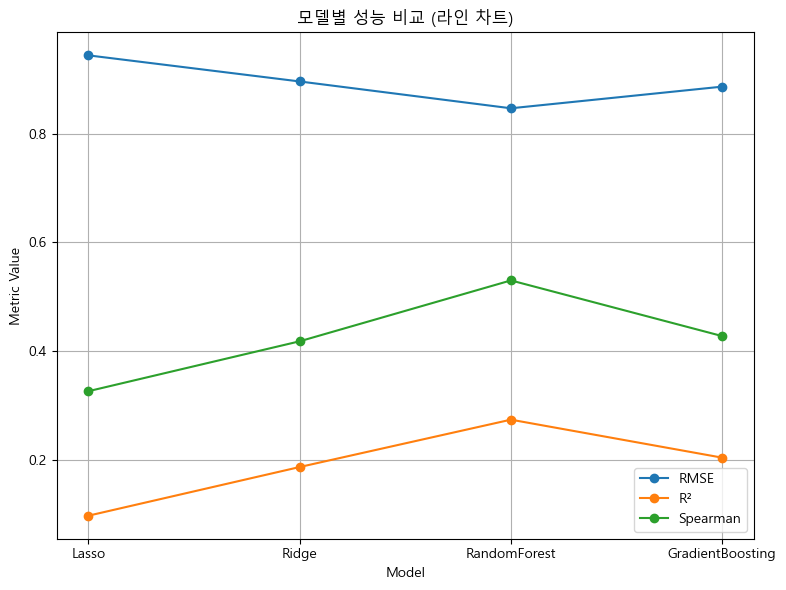

In [53]:
metrics = ["RMSE", "R²", "Spearman"]

plt.figure(figsize=(8, 6))

metrics = ["RMSE", "R²", "Spearman"]
for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("모델별 성능 비교 (라인 차트)")
plt.xlabel("Model")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
results_df

,Model,RMSE,R²,Spearman
0,Lasso,0.943759,0.097220,0.326152
1,Ridge,0.895754,0.186726,0.417926
2,RandomForest,0.846430,0.273824,0.529887
3,GradientBoosting,0.886216,0.203953,0.427507


-------------------------------------------------------------------------------------------------------------------------

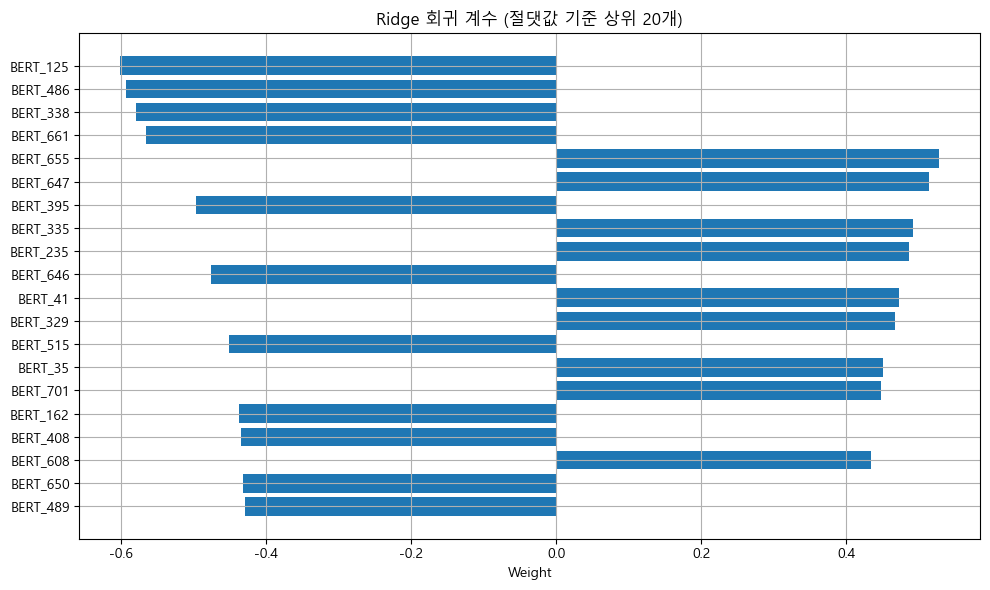

In [55]:
# Ridge 계수 추출
coef = ridge.coef_

# 시각화 (상위 N개)
top_n = 20
indices = np.argsort(np.abs(coef))[-top_n:]  # 절댓값 큰 계수 기준
feature_names = [f"BERT_{i}" for i in range(X_train.shape[1] - 1)] + ["rule_score"]

top_features = [feature_names[i] for i in indices]
top_weights = coef[indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_weights)
plt.title("Ridge 회귀 계수 (절댓값 기준 상위 20개)")
plt.xlabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()